In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


In [2]:
# import dataset
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\SENAPATI SIR FSDS NOTE\OCTOBER MONTH DS NOTE\15th- NAIVE BAYES\adult.csv\adult.csv")
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


EDA

In [3]:
df.shape

(32560, 15)

In [4]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.tail()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
# Rename the column name
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [7]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


we are see that there are no missing values in the dataset.I will comform this further

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
# categorical variable
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [11]:
df[categorical]
# show all the categorical data of top 5 rows

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


There are 9 categorical variable are present . The categorical variable are Dependent variable and the income is the independent variable or target variable


Frequency counts of categorical variables

In [12]:
for var in categorical:
    print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [13]:
# view frequency distriution of categorical variables

for var in categorical:
    print(f"\nFrequency distribution for '{var}':")
    print(df[var].value_counts(normalize=True))



Frequency distribution for 'workclass':
workclass
Private             0.697052
Self-emp-not-inc    0.078041
Local-gov           0.064281
?                   0.056388
State-gov           0.039834
Self-emp-inc        0.034275
Federal-gov         0.029484
Without-pay         0.000430
Never-worked        0.000215
Name: proportion, dtype: float64

Frequency distribution for 'education':
education
HS-grad         0.322512
Some-college    0.223925
Bachelors       0.164435
Masters         0.052918
Assoc-voc       0.042445
11th            0.036087
Assoc-acdm      0.032770
10th            0.028655
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013299
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: proportion, dtype: float64

Frequency distribution for 'marital_status':
marital_status
Married-civ-spouse       0.459951
Never-married            0.328071
Divorced                 0.136456
Separate

Now, we can see that there are several variables like workclass, occupation and native_country which contain missing values. Generally, the missing values are coded as NaN and python will detect them with the usual command of df.isnull().sum().

But, in this case the missing values are coded as ?. Python fail to detect these as missing values because it do not consider ? as missing values. So, I have to replace ? with NaN so that Python can detect these missing values.

In [14]:
df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

we can see that there are 1836 values encoded as ? in work class variable. I relace them as NaN

In [16]:
df['workclass'].replace('?',np.nan,inplace=True)

When reading from a CSV or dataset, sometimes '?' actually appears as:

' ?' (space before the question mark)

'? ' (space after it)

or even ' ? ' (both sides)

Let’s fix that 

And the above code do not work

In [17]:

df['workclass'].replace(r'^\s*\?\s*$', np.nan, regex=True, inplace=True)


In [18]:
print(df['workclass'].value_counts(dropna=False))


workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
NaN                   1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


In [19]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [20]:
# Explore occupation variable
df['occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [21]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [22]:

df['occupation'].replace(r'^\s*\?\s*$', np.nan, regex=True, inplace=True)


In [23]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [24]:
# Explore narive_country variable
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [25]:

df['native_country'].replace(r'^\s*\?\s*$', np.nan, regex=True, inplace=True)


In [26]:
df['native_country'].value_counts()

native_country
United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [27]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [28]:
# check for cardinality in categorical variables
for var in categorical:
    print(var,'contains',len(df[var].unique()),'labels')

workclass contains 9 labels
education contains 16 labels
marital_status contains 7 labels
occupation contains 15 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native_country contains 42 labels
income contains 2 labels


In [29]:
# find for numerical variables

numerical = [var for var in df.columns if df[var].dtype!= 'O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :',numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [30]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [31]:
df[numerical].isna().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

Declare feature vector and target variable

In [32]:
x = df.drop(['income'],axis=1)
y = df['income']

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [34]:
print(f'the shape of x_train is : {x_train.shape}')
print(f' the shape of x_test is :{x_test.shape}')
print(f'the shape of y_test is : {y_test.shape}')
print(f'the shape of y_train is :{y_train.shape}')

the shape of x_train is : (22792, 14)
 the shape of x_test is :(9768, 14)
the shape of y_test is : (9768,)
the shape of y_train is :(22792,)


Feature Engineering

In [35]:
# check the dtype in x_train
x_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [36]:
categorical = [col for col in x_train.columns if x_train[col].dtypes == 'O']
categorical


['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [37]:
# display the numerical variables
numerical = [col for col in x_train.columns if x_train[col].dtypes != 'O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [38]:
# print the percentage of missing value in the categoricalvariables in the traning set
x_train[categorical].isnull().mean()

workclass         0.057213
education         0.000000
marital_status    0.000000
occupation        0.057389
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018252
dtype: float64

In [39]:
for col in categorical:
    if x_train[col].isnull().mean()>0:
        print(col, (x_train[col].isnull().mean()))

workclass 0.057213057213057215
occupation 0.05738855738855739
native_country 0.018252018252018252


In [40]:
# impute missing categorical variables with most friquent values
for df2 in [x_train, x_test]:
    df2['workclass'].fillna(x_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(x_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(x_train['native_country'].mode()[0], inplace=True)   

In [41]:
x_train[categorical].isnull().sum()


workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [42]:
x_test[categorical].isnull().sum()


workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [43]:
# print categorical variable
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [44]:
x_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
20721,32,Self-emp-inc,343872,Some-college,10,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,35,Haiti
32097,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States
25205,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States
23491,37,Private,61778,Bachelors,13,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,30,United-States
12367,24,Private,108495,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,India


In [45]:
x_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
20721,Self-emp-inc,Some-college,Married-civ-spouse,Transport-moving,Husband,Black,Male,Haiti
32097,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25205,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Bachelors,Never-married,Farming-fishing,Not-in-family,White,Male,United-States
12367,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Male,India


In [46]:
x_train[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
20721,32,343872,10,0,0,35
32097,45,170871,9,7298,0,60
25205,47,108890,9,1831,0,38
23491,37,61778,13,0,0,30
12367,24,108495,10,0,0,40


In [47]:
x_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
22278,40,Self-emp-inc,193524,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States
8950,46,Private,188027,Some-college,10,Never-married,Exec-managerial,Unmarried,White,Female,0,0,45,United-States
7838,33,Private,202498,7th-8th,4,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala
16505,21,Private,184756,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,16,United-States
19140,59,Private,106748,7th-8th,4,Married-civ-spouse,Other-service,Wife,White,Female,0,0,99,United-States


In [48]:
x_test[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
22278,Self-emp-inc,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
8950,Private,Some-college,Never-married,Exec-managerial,Unmarried,White,Female,United-States
7838,Private,7th-8th,Separated,Craft-repair,Not-in-family,White,Male,Guatemala
16505,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female,United-States
19140,Private,7th-8th,Married-civ-spouse,Other-service,Wife,White,Female,United-States


In [49]:
x_test[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
22278,40,193524,10,0,0,40
8950,46,188027,10,0,0,45
7838,33,202498,4,0,0,40
16505,21,184756,10,0,0,16
19140,59,106748,4,0,0,99


In [50]:
print(f'shape of x_test[numerical] is :{x_test[numerical].shape}')
print(f'shape of x_test[categorical] is :{x_test[categorical].shape}')
print(f'shape of x_train[numerical] is :{x_train[numerical].shape}')
print(f'shape of x_train[categorical] is :{x_train[categorical].shape}')

shape of x_test[numerical] is :(9768, 6)
shape of x_test[categorical] is :(9768, 8)
shape of x_train[numerical] is :(22792, 6)
shape of x_train[categorical] is :(22792, 8)


In [51]:
# import categorical encoders
import category_encoders as ce

In [52]:
# use of one_hot encoding
categorical_cols = x_train.select_dtypes(include='object').columns
encoder = ce.OneHotEncoder(cols=['workclass','education','occupation','relationship','race','sex','native_country'])
encoder = ce.OneHotEncoder(cols=categorical_cols, use_cat_names=True)
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [53]:
x_train.head()

,age,workclass_ Self-emp-inc,workclass_ Private,workclass_ State-gov,workclass_ Federal-gov,workclass_ Self-emp-not-inc,workclass_ Local-gov,workclass_ Never-worked,workclass_ Without-pay,fnlwgt,...,native_country_ Honduras,native_country_ South,native_country_ Iran,native_country_ Trinadad&Tobago,native_country_ Laos,native_country_ France,native_country_ Peru,native_country_ Hungary,native_country_ Scotland,native_country_ Holand-Netherlands
20721,32,1,0,0,0,0,0,0,0,343872,...,0,0,0,0,0,0,0,0,0,0
32097,45,0,1,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25205,47,0,0,1,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,37,0,1,0,0,0,0,0,0,61778,...,0,0,0,0,0,0,0,0,0,0
12367,24,0,1,0,0,0,0,0,0,108495,...,0,0,0,0,0,0,0,0,0,0


In [54]:
x_test.head()

,age,workclass_ Self-emp-inc,workclass_ Private,workclass_ State-gov,workclass_ Federal-gov,workclass_ Self-emp-not-inc,workclass_ Local-gov,workclass_ Never-worked,workclass_ Without-pay,fnlwgt,...,native_country_ Honduras,native_country_ South,native_country_ Iran,native_country_ Trinadad&Tobago,native_country_ Laos,native_country_ France,native_country_ Peru,native_country_ Hungary,native_country_ Scotland,native_country_ Holand-Netherlands
22278,40,1,0,0,0,0,0,0,0,193524,...,0,0,0,0,0,0,0,0,0,0
8950,46,0,1,0,0,0,0,0,0,188027,...,0,0,0,0,0,0,0,0,0,0
7838,33,0,1,0,0,0,0,0,0,202498,...,0,0,0,0,0,0,0,0,0,0
16505,21,0,1,0,0,0,0,0,0,184756,...,0,0,0,0,0,0,0,0,0,0
19140,59,0,1,0,0,0,0,0,0,106748,...,0,0,0,0,0,0,0,0,0,0


In [55]:
print(f'the shape of x_train is : {x_train.shape}')
print(f' the shape of x_test is :{x_test.shape}')

the shape of x_train is : (22792, 105)
 the shape of x_test is :(9768, 105)


Feature scaling

In [56]:
cols = x_train.columns

In [57]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [58]:
x_train = pd.DataFrame(x_train,columns=cols)

In [59]:
x_test = pd.DataFrame(x_test,columns=cols)

In [60]:
x_train.head()

,age,workclass_ Self-emp-inc,workclass_ Private,workclass_ State-gov,workclass_ Federal-gov,workclass_ Self-emp-not-inc,workclass_ Local-gov,workclass_ Never-worked,workclass_ Without-pay,fnlwgt,...,native_country_ Honduras,native_country_ South,native_country_ Iran,native_country_ Trinadad&Tobago,native_country_ Laos,native_country_ France,native_country_ Peru,native_country_ Hungary,native_country_ Scotland,native_country_ Holand-Netherlands
0,-0.25,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.374471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.066379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.582591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.974966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.585881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Model training


In [61]:
# Train a gaussian naive bayes classifier on the traning set
from sklearn.naive_bayes import GaussianNB
# create a object
gnb = GaussianNB() 
# fit the model
gnb.fit(x_train,y_train)

,priors,None
,var_smoothing,1e-09


Predict the result

In [63]:
y_pred = gnb.predict(x_test)
print(y_pred)

[' >50K' ' <=50K' ' <=50K' ... ' >50K' ' <=50K' ' <=50K']


Check the accuracy score

In [65]:
from sklearn.metrics import accuracy_score
ac= accuracy_score(y_test,y_pred)
print(round(ac,2))


0.82


In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[6105 1349]
 [ 444 1870]]


In [67]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)


              precision    recall  f1-score   support

       <=50K       0.93      0.82      0.87      7454
        >50K       0.58      0.81      0.68      2314

    accuracy                           0.82      9768
   macro avg       0.76      0.81      0.77      9768
weighted avg       0.85      0.82      0.83      9768



In [68]:
bias = gnb.score(x_train,y_train)
print(round(bias,2))

0.81


In [69]:
variance = gnb.score(x_test,y_test)
print(round(variance))

1


check for overfitting and underfitting

In [70]:
print('Traning set score :{:.2f}'.format(gnb.score(x_train,y_train)))
print('Test set score : {:.2f}'.format(gnb.score(x_test,y_test)))

Traning set score :0.81
Test set score : 0.82


The training-set accuracy score is 0.81 while the test-set accuracy to be 0.82. These two values are quite comparable. So, there is no sign of overfitting.

Compare model accuracy with null accuracy
So, the model accuracy is 0.82. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [71]:
# check class distribution in test set
y_test.value_counts()

income
<=50K    7454
>50K     2314
Name: count, dtype: int64

We can see that the occurences of most frequent class is 7454. So, we can calculate null accuracy by dividing 7454 by total number of occurences.

In [73]:
# check the null accuracy score
null_accuracy = (7454/(7454+2314))
print('Null accuracy score : {0:0.2f}'.format(null_accuracy))

Null accuracy score : 0.76


In [78]:
print('confusion_matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


confusion_matrix

 [[6105 1349]
 [ 444 1870]]

True Positives(TP) =  6105

True Negatives(TN) =  1870

False Positives(FP) =  1349

False Negatives(FN) =  444


<Axes: >

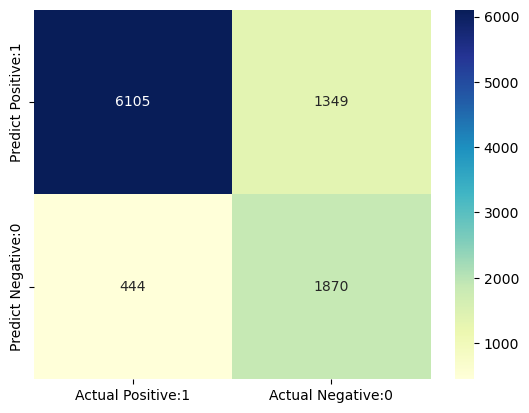

In [79]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification Accuracy

In [80]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [81]:
# print the classification accuracy
classification_accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('classification_accuracy : {0:0.2f}'.format(classification_accuracy))

classification_accuracy : 0.82


In [82]:
# print the classification error
classification_error = (FP+FN) / float(TP+TN+FP+FN)
print('classification_error : {0:0.2f}'.format(classification_error))

classification_error : 0.18


In [83]:
# precision score
preceision = TP/ float(TP + FP)
print('precision : {0:0.2f}'.format(preceision))

precision : 0.82


In [85]:
# Recell
recell = TP /float(TP + FN)
print('Recall : {0:0.2f}'.format(recell))

Recall : 0.93


In [86]:
# True positive rate
True_positive_rate = TP / float(TP + FN)
print('True positive rate : {0:0.2f}'.format(True_positive_rate))

True positive rate : 0.93


In [87]:
# False positive rate
False_positive_rate = FP / float(FP + TN)
print('False positive rate : {0:0.2f}'.format(False_positive_rate))

False positive rate : 0.42


In [88]:
# specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.2f}'.format(specificity))

Specificity : 0.58


# calculate the class probabilities

In [91]:
# first 10 predicted probslilites of iwo classes 0 and 1
y_pred_prob = gnb.predict_proba(x_test)[0:11]
print(y_pred_prob)

[[5.65187154e-02 9.43481285e-01]
 [9.99977898e-01 2.21021023e-05]
 [9.99998716e-01 1.28437690e-06]
 [9.99999999e-01 1.14553388e-09]
 [9.99844406e-01 1.55594116e-04]
 [1.45695734e-01 8.54304266e-01]
 [9.99999934e-01 6.55033777e-08]
 [9.99534858e-01 4.65142119e-04]
 [9.85081734e-01 1.49182659e-02]
 [9.99999992e-01 8.45327133e-09]
 [9.98973984e-01 1.02601566e-03]]


In [92]:
# store the probabilitirs in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob,columns=['Prob of - <=50k','Prob of - >50k'])
print(y_pred_prob_df)

    Prob of - <=50k  Prob of - >50k
0          0.056519    9.434813e-01
1          0.999978    2.210210e-05
2          0.999999    1.284377e-06
3          1.000000    1.145534e-09
4          0.999844    1.555941e-04
5          0.145696    8.543043e-01
6          1.000000    6.550338e-08
7          0.999535    4.651421e-04
8          0.985082    1.491827e-02
9          1.000000    8.453271e-09
10         0.998974    1.026016e-03


In [93]:
# print the first 10 predicted probabilities for class1 - probability of >50k
gnb.predict_proba(x_test)[0:10,1]

array([9.43481285e-01, 2.21021023e-05, 1.28437690e-06, 1.14553388e-09,
       1.55594116e-04, 8.54304266e-01, 6.55033777e-08, 4.65142119e-04,
       1.49182659e-02, 8.45327133e-09])

In [96]:
# store the predicted probabilities for class 1 probabilities of > 50k
y_pred1 = gnb.predict_proba(x_test)[:, 1]


Text(0, 0.5, 'Frequency')

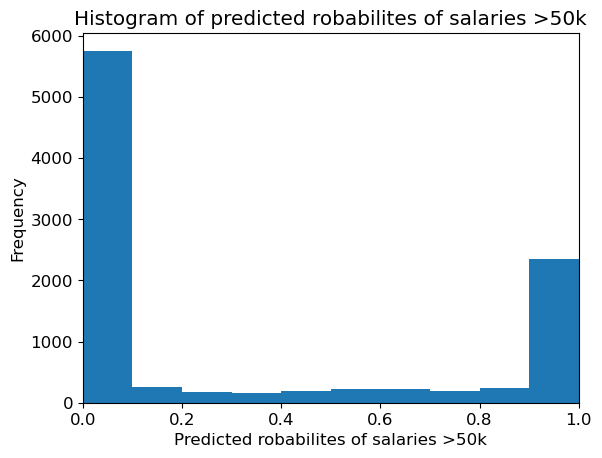

In [98]:
# histogram of predicted probabilities
# adjust the font size
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1,bins=10)

plt.title('Histogram of predicted robabilites of salaries >50k')

# set the x_axis limit
plt.xlim(0,1)
plt.xlabel('Predicted robabilites of salaries >50k')
plt.ylabel('Frequency')

Observations

1. We can see that the above histogram is highly positive skewed.

2. The first column tell us that there are approximately 5700 observations with probability between 0.0 and 0.1 whose salary is <=50K.

3. There are relatively small number of observations with probability > 0.5.

4. These small number of observations predict that the salaries will be >50K.

Majority of observations predcit that the salaries will be <=50K.

AUC-ROC CURVE

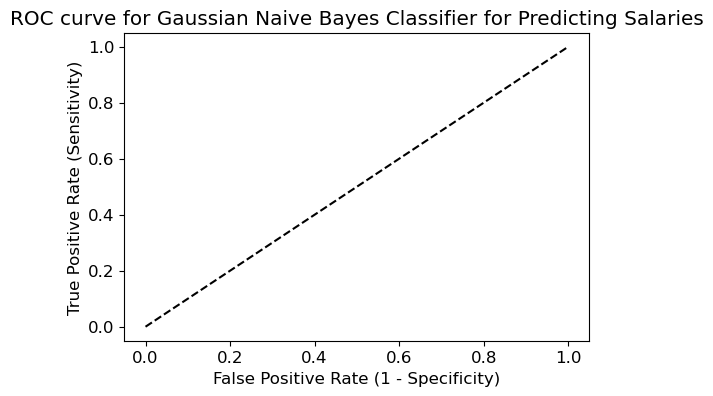

In [99]:
# ROC curve
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,y_pred1,pos_label='>50k')
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,linewidth = 2)
plt.plot([0,1],[0,1],'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [101]:
# compute FOC AUC
from sklearn.metrics import roc_auc_score
ROV_AUC = roc_auc_score(y_test,y_pred1)
print('ROC AUC :{:.2F}'.format(ROV_AUC))

ROC AUC :0.90


In [103]:
#Calculate the cross validation ROC AND AUC
from sklearn.model_selection import cross_val_score
cross_validated_ROC_AUC = cross_val_score(gnb,x_train,y_train,cv = 5,scoring='roc_auc').mean()
print('cross validated_ROC_AUC : {:.2f}'.format(cross_validated_ROC_AUC))

cross validated_ROC_AUC : 0.89


# K-Fold Cross validation

In [104]:
# Aplying 10-fold cross validation
score = cross_val_score(gnb,x_train,y_train,cv = 10,scoring='accuracy')
print('cross_val_score : {}'.format(score))

cross_val_score : [0.81008772 0.81622807 0.80298376 0.8095656  0.78850373 0.8174638
 0.81790259 0.80342255 0.8174638  0.80254498]


In [105]:
# compute Average cross-validation score
print('Average cross-validation score : {:.2f}'.format(score.mean()))

Average cross-validation score : 0.81
